<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/Hackathon_Wipro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reading the DataSet**

In [99]:
import pandas as pd
df_raw_train=pd.read_csv("/content/drive/MyDrive/Hackathon/Hackathon_Wipro/train (1).csv")

In [100]:
df_raw_test=pd.read_csv("/content/drive/MyDrive/Hackathon/Hackathon_Wipro/test (1).csv")

In [101]:
df_raw_train.shape

(175296, 18)

In [102]:
df_raw_test.shape

(17520, 18)

In [103]:
df_raw_train.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [56]:
df_raw_test.head()

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,NaN,NaN,NaN
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,NaN,NaN,NaN
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,NaN,NaN,NaN
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,NaN,NaN,NaN
4,2019,1,1,2,0,0,18.0,18.0,1008,99.71,131.20,3.6,186,3.1,0,NaN,NaN,NaN


In [104]:
df_raw_train.isna().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
dtype: int64

In [105]:
df_raw_test.isna().sum()

Year                      0
Month                     0
Day                       0
Hour                      0
Minute                    0
Cloud Type                0
Dew Point                 0
Temperature               0
Pressure                  0
Relative Humidity         0
Solar Zenith Angle        0
Precipitable Water        0
Wind Direction            0
Wind Speed                0
Fill Flag                 0
Clearsky DHI          17520
Clearsky DNI          17520
Clearsky GHI          17520
dtype: int64

In [106]:
df_raw_test.drop(df_raw_test.columns[[15, 16, 17]], axis = 1, inplace = True)

In [107]:
df_raw_test.isna().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
dtype: int64

In [14]:
df_raw_train.corr()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
Year,1.000000,-1.250676e-04,1.438112e-04,0.000000e+00,0.000000,-0.027271,0.010488,0.001011,0.059987,0.059990,0.041339,0.170655,0.006729,-0.000043,0.057450,-0.032013,-0.025577,0.132889
Month,-0.000125,1.000000e+00,1.079604e-02,-2.852658e-19,0.000000,-0.052826,-0.020091,-0.039901,-0.017394,0.146819,0.200660,-0.046228,-0.109397,0.039427,0.180774,-0.132582,-0.097522,0.005900
Day,0.000144,1.079604e-02,1.000000e+00,-1.030673e-17,0.000000,-0.004006,0.000962,0.000383,0.001174,0.023617,0.022825,-0.040792,0.000032,-0.001020,0.008565,0.006696,-0.006481,-0.001522
Hour,0.000000,-2.852658e-19,-1.030673e-17,1.000000e+00,0.000000,0.688314,0.738537,0.650697,-0.026036,0.021269,0.281493,-0.027240,-0.496931,-0.732434,0.012487,0.005142,0.247012,0.055630
Minute,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,-0.001514,-0.001348,-0.000164,0.000485,-0.002042,-0.011724,-0.001636,0.018638,-0.000006,-0.000083,0.000011,-0.009258,-0.000929
Clearsky DHI,-0.027271,-5.282618e-02,-4.005800e-03,6.883137e-01,-0.001514,1.000000,0.860988,0.912991,0.022479,0.222931,0.503409,-0.093766,-0.559766,-0.873421,0.207504,-0.000195,0.315655,0.000740
Clearsky DNI,0.010488,-2.009111e-02,9.616594e-04,7.385367e-01,-0.001348,0.860988,1.000000,0.927926,-0.073302,0.033601,0.384353,0.007043,-0.680471,-0.886323,-0.002180,0.006256,0.381162,0.006318
Clearsky GHI,0.001011,-3.990135e-02,3.825070e-04,6.506965e-01,-0.000164,0.912991,0.927926,1.000000,-0.047297,0.140420,0.478273,-0.050556,-0.655765,-0.891033,0.108725,0.004944,0.349180,-0.030297
Cloud Type,0.059987,-1.739447e-02,1.173973e-03,-2.603568e-02,0.000485,0.022479,-0.073302,-0.047297,1.000000,0.202096,0.066777,-0.137158,0.235374,0.026873,0.326904,-0.081565,0.072632,0.090161
Dew Point,0.059990,1.468194e-01,2.361671e-02,2.126862e-02,-0.002042,0.222931,0.033601,0.140420,0.202096,1.000000,0.848948,-0.419534,0.193455,-0.222336,0.881881,-0.076357,-0.140699,0.036851


In [128]:
cols = ['Year','Month','Day','Hour','Minute','Cloud Type','Dew Point','Temperature','Pressure','Relative Humidity','Solar Zenith Angle','Precipitable Water','Wind Direction','Wind Speed','Fill Flag'] # one or more

Q1 = df_raw_train[cols].quantile(0.25)
Q3 = df_raw_train[cols].quantile(0.75)
IQR = Q3 - Q1

df_new_train = df_raw_train[~((df_raw_train[cols] < (Q1 - 1.5 * IQR)) |(df_raw_train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [129]:
df_raw_train.shape

(175296, 18)

In [130]:
df_new_train.shape

(160587, 18)

In [131]:
cols = ['Year','Month','Day','Hour','Minute','Cloud Type','Dew Point','Temperature','Pressure','Relative Humidity','Solar Zenith Angle','Precipitable Water','Wind Direction','Wind Speed','Fill Flag'] # one or more

Q1 = df_raw_test[cols].quantile(0.25)
Q3 = df_raw_test[cols].quantile(0.75)
IQR = Q3 - Q1

df_new_test = df_raw_test[~((df_raw_test[cols] < (Q1 - 1.5 * IQR)) |(df_raw_test[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [132]:
df_raw_test.shape

(17520, 15)

In [133]:
df_new_test.shape

(15379, 15)

In [141]:
df_raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                175296 non-null  int64  
 1   Month               175296 non-null  int64  
 2   Day                 175296 non-null  int64  
 3   Hour                175296 non-null  int64  
 4   Minute              175296 non-null  int64  
 5   Clearsky DHI        175296 non-null  int64  
 6   Clearsky DNI        175296 non-null  int64  
 7   Clearsky GHI        175296 non-null  int64  
 8   Cloud Type          175296 non-null  int64  
 9   Dew Point           175296 non-null  float64
 10  Temperature         175296 non-null  float64
 11  Pressure            175296 non-null  int64  
 12  Relative Humidity   175296 non-null  float64
 13  Solar Zenith Angle  175296 non-null  float64
 14  Precipitable Water  175296 non-null  float64
 15  Wind Direction      175296 non-nul

**Splitting X and Y**

In [142]:
x_train = df_new_train[df_raw_train.columns[[0,1,2,3,4,8,9,10,11,12,13,14,15,16,17]]]

In [143]:
y = df_new_train[['Clearsky DHI','Clearsky DNI','Clearsky GHI']]

**Multicolinearity**

In [116]:
VIF = []

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [125]:
for j in range(x_train.shape[1]):
    VIF.append(variance_inflation_factor(x_train.values,j))
print(VIF)

[46245.974275635475, 5.3059492401225645, 4.207812186287766, 8.913927560888547, 2.009743161582795, 2.0454000079828845, 286.84191861041285, 414.4490697708392, 43239.055524729505, 423.320668754182, 23.501535305124044, 23.42731438479347, 5.028762130248551, 5.6322128943944145, nan]


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [127]:
import numpy as np
np.transpose(VIF)
pd.DataFrame(x_train.columns)
pd.DataFrame(np.transpose(VIF))
pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(VIF))], axis =1)

,0,0
0,Year,46245.974276
1,Month,5.305949
2,Day,4.207812
3,Hour,8.913928
4,Minute,2.009743
5,Cloud Type,2.045400
6,Dew Point,286.841919
7,Temperature,414.449070
8,Pressure,43239.055525
9,Relative Humidity,423.320669


In [145]:
x_train.head(2)

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0


In [144]:
y.head(2)

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,0,0,0
1,0,0,0


In [85]:
x_test_data = df_new_test[df_raw_train.columns[[0,1,2,3,4,8,9,10,11,12,13,14,15,16,17]]]

**Standardization**

In [146]:
from sklearn.preprocessing import StandardScaler
x_scale_train = StandardScaler().fit_transform(x_train)

In [87]:
from sklearn.preprocessing import StandardScaler
x_scale_test = StandardScaler().fit_transform(x_test_data)

**Splitting Train and Test**

In [147]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scale_train,y,test_size=0.25, random_state=20)

**Train Linear Regression Model with train data Data Set**

In [148]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred_lr = LR.predict(x_test)

In [149]:
y_pred_lr

array([[  20.18293309,   55.04419057,   51.34745483],
       [   2.54333013,  -57.10053308,  -81.98424594],
       [  95.90129038,  495.52637816,  447.49449262],
       ...,
       [  20.76503398,  109.26549992,   68.10435812],
       [  65.44885926,  592.67768721,  383.35209711],
       [ -33.14355588, -221.85390815, -240.98210953]])

In [150]:
from sklearn.metrics import mean_squared_error
lr_mse = mean_squared_error(y_test,y_pred_lr)
print(lr_mse)

12851.768750713012


In [ ]:
KNN_acc = accuracy_score(y_test,y_pred_knn)
print(KNN_acc)
KNN_cm = confusion_matrix(y_test,y_pred_knn)
print(KNN_cm)
KNN_cr = classification_report(y_test,y_pred_knn)
print(KNN_cr)

0.51973751666154
[[2815  109 1696  249]
 [ 110  191   87   41]
 [1678  114 1795   83]
 [ 376   58   83  268]]
              precision    recall  f1-score   support

           a       0.57      0.58      0.57      4869
           s       0.40      0.45      0.42       429
           u       0.49      0.49      0.49      3670
           w       0.42      0.34      0.38       785

    accuracy                           0.52      9753
   macro avg       0.47      0.46      0.47      9753
weighted avg       0.52      0.52      0.52      9753



In [ ]:
acc_score_knn

0.51973751666154

**Applying Test Data on Trained KN N model**

In [ ]:
y_pred_knn_test = KNN_CLF.predict(x_scale_test)

In [ ]:
y_pred_knn_test

array(['a', 'u', 'u', ..., 'u', 'u', 'a'], dtype=object)

In [ ]:
type(y_pred_knn_test)

numpy.ndarray

In [ ]:
sub =pd.DataFrame(y_pred_knn_test)

**Export the Submission**

In [ ]:
sub.to_excel(r'/content/drive/MyDrive/Hackathon/submission/Final_sub.xlsx', index = False)

In [ ]:
test_accuracy =[]
k_values = range(1,16)

In [ ]:
for i in k_values:
    knn_clf =KNeighborsClassifier(n_neighbors=i, p=2)
    KNN_CLF.fit(x_train,y_train)
    y_pred_knn = KNN_CLF.predict(x_test)
    test_accuracy.append(accuracy_score(y_pred_knn,y_test).round(2))

In [ ]:
print(test_accuracy)

[0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52]


No handles with labels found to put in legend.


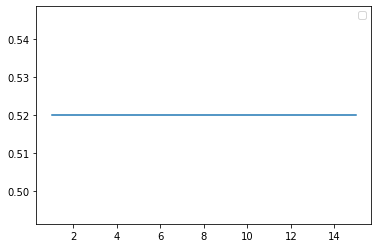

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_values,test_accuracy)
plt.legend()
plt.show()

**Model fitting of SVM with training data set**

In [ ]:
from sklearn.svm import SVC
sv_clf = SVC(kernel = "rbf", gamma = 'auto')
sv_clf.fit(x_train,y_train)
y_pred_sv = sv_clf.predict(x_test)

In [ ]:
SVM_acc = accuracy_score(y_test,y_pred_sv)
print(SVM_acc)
SVM_cm = confusion_matrix(y_test,y_pred_sv)
print(SVM_cm)
SVM_cr = classification_report(y_test,y_pred_sv)
print(SVM_cr)

0.5277350558802419
[[3410   24 1289  146]
 [ 146  103  134   46]
 [2064   37 1481   88]
 [ 497   23  112  153]]
              precision    recall  f1-score   support

           a       0.56      0.70      0.62      4869
           s       0.55      0.24      0.33       429
           u       0.49      0.40      0.44      3670
           w       0.35      0.19      0.25       785

    accuracy                           0.53      9753
   macro avg       0.49      0.38      0.41      9753
weighted avg       0.52      0.53      0.51      9753



In [ ]:
y_pred_sv_test = sv_clf.predict(x_scale_test)

In [ ]:
y_pred_sv_test

array(['u', 'a', 'a', ..., 'a', 'u', 'u'], dtype=object)

**Model fitting with Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred_log = log_reg.predict(x_test)

In [ ]:
y_pred_log

array(['a', 'a', 'a', ..., 'a', 'a', 'a'], dtype=object)

In [ ]:
LR_acc = accuracy_score(y_test,y_pred_log)
print(LR_acc)
LR_cm = confusion_matrix(y_test,y_pred_log)
print(LR_cm)
LR_cr = classification_report(y_test,y_pred_log)
print(LR_cr)

0.4994360709525274
[[4407    0  397   65]
 [ 355   18   56    0]
 [3238    0  419   13]
 [ 727    2   29   27]]
              precision    recall  f1-score   support

           a       0.50      0.91      0.65      4869
           s       0.90      0.04      0.08       429
           u       0.47      0.11      0.18      3670
           w       0.26      0.03      0.06       785

    accuracy                           0.50      9753
   macro avg       0.53      0.27      0.24      9753
weighted avg       0.49      0.50      0.40      9753



In [ ]:
y_pred_log_test = log_reg.predict(x_scale_test)

In [ ]:
y_pred_log_test

array(['u', 'a', 'u', ..., 'a', 'a', 'a'], dtype=object)

**Model fitting of training Data Set with Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = "entropy", max_depth=None)
DT.fit(x_train,y_train)
y_pred_dt = DT.predict(x_test)

In [ ]:
y_pred_dt

array(['a', 'a', 'a', ..., 'u', 'a', 'u'], dtype=object)

In [ ]:
DT_acc = accuracy_score(y_test,y_pred_dt)
print(DT_acc)
DT_cm = confusion_matrix(y_test,y_pred_dt)
print(DT_cm)
DT_cr = classification_report(y_test,y_pred_dt)
print(DT_cr)

0.5100994565774634
[[2738   96 1702  333]
 [  94  174  105   56]
 [1697  112 1755  106]
 [ 317   52  108  308]]
              precision    recall  f1-score   support

           a       0.57      0.56      0.56      4869
           s       0.40      0.41      0.40       429
           u       0.48      0.48      0.48      3670
           w       0.38      0.39      0.39       785

    accuracy                           0.51      9753
   macro avg       0.46      0.46      0.46      9753
weighted avg       0.51      0.51      0.51      9753



In [ ]:
dt_score = []
md = range(1,57)
for i in md:
    dt = DecisionTreeClassifier(criterion = "entropy", max_depth=i)
    dt.fit(x_train,y_train)
    dt_pred = dt.predict(x_test)
    dt_score.append(accuracy_score(y_test,dt_pred))
print(dt_score)

[0.4992310058443556, 0.49912847329026966, 0.5002563313852149, 0.5071260125089716, 0.5021019173587614, 0.5178919306879934, 0.5124577053214395, 0.515738747052189, 0.5130729006459551, 0.5177893981339076, 0.5148159540654158, 0.5168666051471342, 0.513175433200041, 0.5180969957961653, 0.5183020609043372, 0.5223008305136881, 0.5133804983082129, 0.5113298472264944, 0.5127653029836973, 0.5125602378755255, 0.5169691377012201, 0.513175433200041, 0.5100994565774634, 0.5167640725930482, 0.5176868655798216, 0.5151235517276735, 0.5155336819440173, 0.5161488772685328, 0.5159438121603609, 0.5153286168358454, 0.5143032912949862, 0.5133804983082129, 0.5119450425510099, 0.5140982261868143, 0.5147134215113298, 0.5133804983082129, 0.5148159540654158, 0.5130729006459551, 0.510509586793807, 0.5137906285245566, 0.5173792679175638, 0.5119450425510099, 0.5112273146724085, 0.5148159540654158, 0.5138931610786425, 0.5135855634163847, 0.5123551727673537, 0.5144058238490721, 0.5143032912949862, 0.5122526402132677, 0.

No handles with labels found to put in legend.


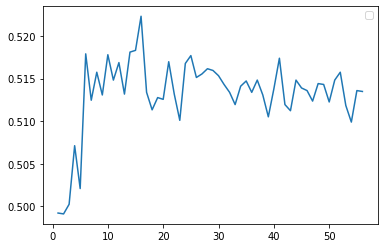

In [ ]:
import matplotlib.pyplot as plt
plt.plot(md,dt_score)
plt.legend()

In [ ]:
y_pred_dt_test = DT.predict(x_scale_test)

In [ ]:
y_pred_dt_test

array(['u', 'a', 'u', ..., 'u', 'a', 'a'], dtype=object)

In [ ]:
DT.tree_.node_count

18745

In [ ]:
DT.tree_.max_depth

50

**Model fitting with Ensemble Methods**

**Ada Bosst**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADB = AdaBoostClassifier(base_estimator=DT, n_estimators=100)
ADB.fit(x_train,y_train)
y_pred_adab = ADB.predict(x_test)

In [ ]:
adab_acc = accuracy_score(y_test,y_pred_adab)
print(adab_acc)
adab_cm = confusion_matrix(y_test,y_pred_adab)
print(adab_cm)
adab_cr = classification_report(y_test,y_pred_adab)
print(adab_cr)

0.5206603096483133
[[2816   85 1689  279]
 [ 103  160  122   44]
 [1659   92 1831   88]
 [ 371   32  111  271]]
              precision    recall  f1-score   support

           a       0.57      0.58      0.57      4869
           s       0.43      0.37      0.40       429
           u       0.49      0.50      0.49      3670
           w       0.40      0.35      0.37       785

    accuracy                           0.52      9753
   macro avg       0.47      0.45      0.46      9753
weighted avg       0.52      0.52      0.52      9753



**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GRB = GradientBoostingClassifier(n_estimators=100)
GRB.fit(x_train,y_train)
y_pred_grb= GRB.predict(x_test)

In [ ]:
grb_acc = accuracy_score(y_test,y_pred_grb)
print(grb_acc)
grb_cm = confusion_matrix(y_test,y_pred_grb)
print(grb_cm)
grb_cr = classification_report(y_test,y_pred_grb)
print(grb_cr)

0.5166615400389624
[[3623   19 1089  138]
 [ 156  110  148   15]
 [2393   44 1192   41]
 [ 560    9  102  114]]
              precision    recall  f1-score   support

           a       0.54      0.74      0.62      4869
           s       0.60      0.26      0.36       429
           u       0.47      0.32      0.38      3670
           w       0.37      0.15      0.21       785

    accuracy                           0.52      9753
   macro avg       0.50      0.37      0.39      9753
weighted avg       0.50      0.52      0.49      9753



In [ ]:
import numpy as np
np.arange(0.01,0.2,0.01)
range(1,100)

range(1, 100)

In [ ]:
np.arange(0.01,0.2,0.01)


array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19])

In [ ]:
y_test

19893    a
32235    a
13939    a
17470    a
22714    u
        ..
37601    a
39691    u
640      a
32256    u
38284    u
Name: season, Length: 9753, dtype: object

In [ ]:
y_pred_grb

array(['a', 'a', 'a', ..., 'a', 'a', 'a'], dtype=object)

**XG Boosting**

In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train,y_train)
y_pred_xgb= XGB.predict(x_scale_test)

In [ ]:
acc_score_xgb = accuracy_score(y_test,y_pred_xgb).round(3)

In [ ]:
acc_score_xgb

0.518

**Model fitting With Bagging**

In [ ]:
from sklearn.ensemble import BaggingClassifier
Bag= BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.9,
                  n_estimators=500, random_state=10)

In [ ]:
Bag.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.9,
                  n_estimators=500, random_state=10)

In [ ]:
y_pred_bag= Bag.predict(x_test)

In [ ]:
bag_acc = accuracy_score(y_test,y_pred_bag)
print(bag_acc)
bag_cm = confusion_matrix(y_test,y_pred_bag)
print(bag_cm)
bag_cr = classification_report(y_test,y_pred_bag)
print(bag_cr)

0.5200451143237979
[[2790   87 1692  300]
 [  89  188  105   47]
 [1653  121 1792  104]
 [ 344   44   95  302]]
              precision    recall  f1-score   support

           a       0.57      0.57      0.57      4869
           s       0.43      0.44      0.43       429
           u       0.49      0.49      0.49      3670
           w       0.40      0.38      0.39       785

    accuracy                           0.52      9753
   macro avg       0.47      0.47      0.47      9753
weighted avg       0.52      0.52      0.52      9753



In [ ]:
acc_score_bagging=[]
settings = np.arange(0.1,1,0.1)

No need to code Random State incase of Bagging. Bagging Will take care of Sample by default.

In [ ]:
for i in settings:
    bag = BaggingClassifier(base_estimator=DT, max_samples=i, n_estimators=10)
    bag.fit(x_train,y_train)
    y_pred_bg = bag.predict(x_test)
    acc_score_bagging.append(accuracy_score(y_pred_bg,y_test))
print(acc_score_bagging)

[0.5112273146724085, 0.5162514098226186, 0.5175843330257357, 0.515738747052189, 0.5159438121603609, 0.5162514098226186, 0.5176868655798216, 0.5215831026350867, 0.515841279606275, 0.523838818824977, 0.5201476468778837, 0.5196349841074541, 0.517276735363478, 0.5169691377012201, 0.5192248538911104, 0.5205577770942275, 0.5168666051471342, 0.5135855634163847]


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_features=0.6, n_estimators=100)
RF.fit(x_train,y_train)
y_RF_pred = RF.predict(x_test)

In [ ]:
RF_acc = accuracy_score(y_test,y_RF_pred)
print(RF_acc)
RF_cm = confusion_matrix(y_test,y_RF_pred)
print(RF_cm)
RF_cr = classification_report(y_test,y_RF_pred)
print(RF_cr)

0.5190197887829385
[[2792   86 1692  299]
 [  96  190   92   51]
 [1658  112 1791  109]
 [ 346   45  105  289]]
              precision    recall  f1-score   support

           a       0.57      0.57      0.57      4869
           s       0.44      0.44      0.44       429
           u       0.49      0.49      0.49      3670
           w       0.39      0.37      0.38       785

    accuracy                           0.52      9753
   macro avg       0.47      0.47      0.47      9753
weighted avg       0.52      0.52      0.52      9753



In [ ]:
RF_score = []
setting = np.arange(0.1,1,0.1)
for i in setting:
    RF = RandomForestClassifier(max_features=i, n_estimators=100)
    RF.fit(x_train,y_train)
    RF_pred = RF.predict(x_test)
    RF_score.append(accuracy_score(y_test,y_RF_pred))

print(RF_score)

[0.5190197887829385, 0.5190197887829385, 0.5190197887829385, 0.5190197887829385, 0.5190197887829385, 0.5190197887829385, 0.5190197887829385, 0.5190197887829385, 0.5190197887829385]
